In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from guizero import App, Window, PushButton, Text, TextBox, Combo, MenuBar, ListBox
from guizero import Text, Picture, Drawing, Box, TitleBox
from guizero import info, warn, error, yesno, question

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter as tk
from tkinter import Tk, Label

from guizero import App, Text, TextBox, PushButton, Slider, Picture, CheckBox, Combo, ListBox, ButtonGroup, info
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

import utils

In [2]:
import mysql
import mysql.connector 

db = mysql.connector.connect(
    host = 'localhost',
    port = 3306,
    user = 'root',
    password = 'Snehitha@99',
    database = 'cricket_app'
)

cur = db.cursor()


In [3]:
def open_page_1():
    home_page.hide()
    page_1.show()


def open_page_2():
    home_page.hide()
    page_2.show()


def open_page_3():
    home_page.hide()
    page_3.show()


def close_home_page():
    home_page.destroy()


def return_home():
    page_1.hide()
    page_2.hide()
    page_3.hide()
    page_2_reset()
    page_3_reset()
    home_page.show()

def page_2_reset():
    leftTeamBox2.text = 'Player 1'
    rightTeamBox2.text = 'Player 2'

    matchplayed1_text.value = ''
    runs1_text.value = ''
    strikerate1_text.value = ''
    wickets1_text.value = ''
    economy1_text.value = ''


def page_3_reset():
    leftTeamBox.text = 'Team 1'
    rightTeamBox.text = 'Team 2'

    matchcount1_text.value = ''
    win1_text.value = ''
    wr1_text.value = ''
    sr1_text.value = ''
    eco1_text.value = ''

    matchcount2_text.value = ''
    win2_text.value = ''
    wr2_text.value = ''
    sr2_text.value = ''
    eco2_text.value = ''

def get_page_filters():
    query = 'select distinct year(match_date) from matchinfo order by year(match_date);'
    df = pd.read_sql(query, db)
    seasons = ['All'] + list(df['year(match_date)'].values)

    query = 'select distinct match_date from matchinfo;'
    df = pd.read_sql(query, db)
    dates = ['All'] + list(pd.to_datetime(df['match_date']).dt.strftime('%d-%b').values)

    query = 'select team_name from team;'
    df = pd.read_sql(query, db)
    teams = ['All'] + df.sort_values(by='team_name')['team_name'].values.tolist()

    inns = ['All'] +[ '1','2','3','4']

    query = 'select distinct player_name from player;'
    df = pd.read_sql(query, db)
    players = ['All'] + df.sort_values(by='player_name')['player_name'].values.tolist()

    return seasons, dates, teams, inns, players

C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\1808107782.py:57: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\1808107782.py:61: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\1808107782.py:65: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\1808107782.py:71: UserWarning: pandas only supports S

4


C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\662611467.py:107: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query4, db)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\662611467.py:113: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\662611467.py:137: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query5, db)
C:\Users\harsh\AppData\Local\Temp\ipykernel_21608\662611467.py:163: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
C:

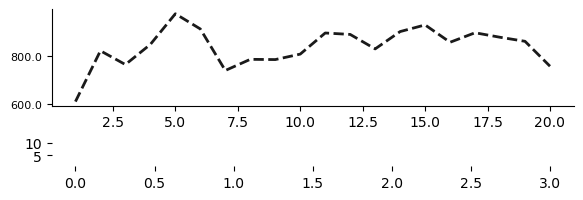

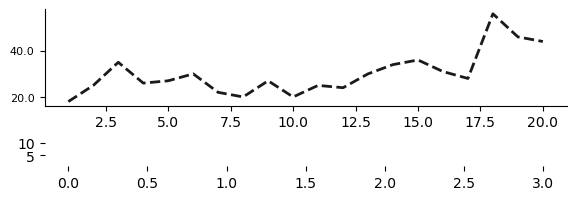

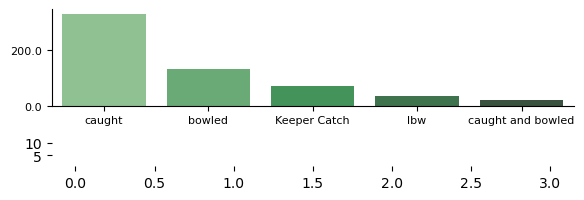

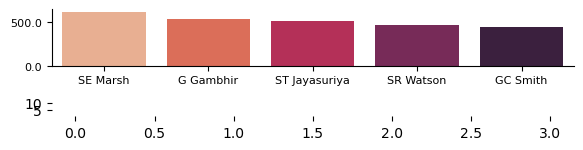

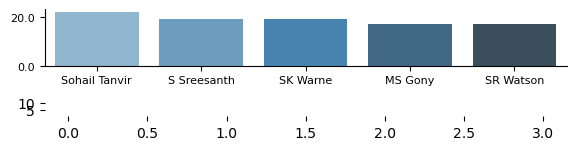

In [4]:
import utils

def page1_update_info():
    if  page1_combo_date.value != 'All':
        date = page1_combo_date.value + '-' + page1_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page1_combo_date.value

    #############################
    query1 = utils.page1_get_info(1, page1_combo_season.value, date, page1_combo_hometeam.value,
                    page1_combo_visitteam.value, page1_combo_inn.value, page1_combo_bat.value, page1_combo_bowl.value
                    )
    df = pd.read_sql(query1, db)
    fig, ax = plt.subplots(2, 1, figsize=(6, 2), gridspec_kw={'height_ratios': [4, 1]})
    fig.tight_layout(pad=0.5)
    sns.lineplot(x=df['over_number'], y=df['runs_scored'], ax=ax[0], linewidth=2, linestyle='dashed', color=(0.1,0.1,0.1))
    # ax[0].set_xticklabels([])
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ypoints = np.array([3, 8, 1, 10])
    ax[1].plot(ypoints, color='white')
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    plt.subplots_adjust(left=0.10)
    canvas = FigureCanvasTkAgg(fig, runsBox.tk)
    canvas.draw()
    canvas.get_tk_widget().place(x=0, y=0) # .pack(fill='x', side='top', expand=True) # .place(x=60, y=20)

    # plt.savefig('page1_plot1.png')
    # plot1 = Picture(runsBox, image='page1_plot1.png')
    
    # fig, ax = plt.subplots(figsize=(4.5, 1))
    # fig.tight_layout()
    # ax.plot(df['over_number'], df['runs_scored'])
    # canvas = FigureCanvasTkAgg(fig, runsBox.tk)
    # canvas.draw()
    # canvas.get_tk_widget().place(x=60, y=20) #.pack(fill='x', side='top', expand=True)

    #############################

    query2 = utils.page1_get_info(2, page1_combo_season.value, date, page1_combo_hometeam.value,
                    page1_combo_visitteam.value, page1_combo_inn.value, page1_combo_bat.value, page1_combo_bowl.value
                    )
    df = pd.read_sql(query2, db)

    fig, ax = plt.subplots(2, 1, figsize=(6, 2), gridspec_kw={'height_ratios': [4, 1]})
    fig.tight_layout(pad=0.5)
    sns.lineplot(x=df['Over_Number'], y=df['Number_of_Wickets'], ax=ax[0], linewidth=2, linestyle='dashed', color=(0.1,0.1,0.1))
    # ax[0].set_xticklabels([])
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ypoints = np.array([3, 8, 1, 10])
    ax[1].plot(ypoints, color='white')
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    plt.subplots_adjust(left=0.10)
    canvas = FigureCanvasTkAgg(fig, wicketOverBox.tk)
    canvas.draw()
    canvas.get_tk_widget().place(x=0, y=0) #.pack(fill='x', side='top', expand=True)

    #############################

    query3 = utils.page1_get_info(3, page1_combo_season.value, date, page1_combo_hometeam.value,
                    page1_combo_visitteam.value, page1_combo_inn.value, page1_combo_bat.value, page1_combo_bowl.value
                    )
    df = pd.read_sql(query3, db)    
    if df.empty:
        print(1)
        n_four = 0
        n_six = 0
    elif 4 not in df['Boundary_Type'].values:
        print(2)
        n_four = 0
        n_six = df[df['Boundary_Type']==6]['Number_of_Boundaries'].iloc[0]
    elif 6 not in df['Boundary_Type'].values:
        print(3)
        n_four = df[df['Boundary_Type']==4]['Number_of_Boundaries'].iloc[0]
        n_six = 0
    else:
        print(4)
        n_four = df[df['Boundary_Type']==4]['Number_of_Boundaries'].iloc[0]
        n_six = df[df['Boundary_Type']==6]['Number_of_Boundaries'].iloc[0]
    four_text.value = str(n_four)
    six_text.value = str(n_six)

    #############################

    query4 = utils.page1_get_info(4, page1_combo_season.value, date, page1_combo_hometeam.value,
                page1_combo_visitteam.value, page1_combo_inn.value, page1_combo_bat.value, page1_combo_bowl.value
                )
    df = pd.read_sql(query4, db)
    fig, ax = plt.subplots(2, 1, figsize=(6, 2), gridspec_kw={'height_ratios': [4, 1]})
    fig.tight_layout(pad=0.5)
    df = df.iloc[:5]
    sns.barplot(x=df['Wicket_Type'], y=df['Number_of_Wickets'], ax=ax[0], palette='Greens_d')
    ax[0].set_xticklabels(df['Wicket_Type'], fontsize=8) #, rotation=30)
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ypoints = np.array([3, 8, 1, 10])
    ax[1].plot(ypoints, color='white')
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    plt.subplots_adjust(left=0.10)
    canvas = FigureCanvasTkAgg(fig, wicketTypeBox.tk)
    canvas.draw()
    canvas.get_tk_widget().place(x=0, y=0) # .pack(fill='x', side='top', expand=True)


    #############################

    query5 = utils.page1_get_info(5, page1_combo_season.value, date, page1_combo_hometeam.value,
                    page1_combo_visitteam.value, page1_combo_inn.value, page1_combo_bat.value, page1_combo_bowl.value
                    )
    df = pd.read_sql(query5, db)
    # listbox1.items = df['batter_name'].values
    # listbox1 = ListBox(battersBox, items=df['batter_name'].values)
    # lst = list(df.itertuples(index=False, name=None))
    # total_rows = len(lst)
    # total_columns = len(lst[0])
    # battersBox.add_tk_widget(Table)
     
    # fig, ax = plt.subplots(plt.subplots(2, 1), figsize=(6, 1.5))
    # df = df.iloc[:5]
    # sns.barplot(x=df['batter_name'], y=df['total_runs_scored'], ax=ax, palette='rocket_r')
    # ax.set_xticklabels(df['batter_name'], fontsize=8) #, rotation=30)
    # ax.set_yticklabels(ax.get_yticks(), fontsize=8)
    # ax.set_xlabel(None)
    # ax.set_ylabel(None)
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    # canvas = FigureCanvasTkAgg(fig, battersBox.tk)
    # canvas.draw()
    # canvas.get_tk_widget().place(x=0, y=0) #.pack(fill='x', side='top', expand=True)

    fig, ax = plt.subplots(2, 1, figsize=(6, 1.5), gridspec_kw={'height_ratios': [4, 1]})
    fig.tight_layout(pad=0.5)
    df = df.iloc[:5]
    sns.barplot(x=df['batter_name'], y=df['total_runs_scored'], ax=ax[0], palette='rocket_r')
    ax[0].set_xticklabels(df['batter_name'], fontsize=8) #, rotation=30)
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ypoints = np.array([3, 8, 1, 10])
    ax[1].plot(ypoints, color='white')
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    plt.subplots_adjust(left=0.10)
    canvas = FigureCanvasTkAgg(fig, battersBox.tk)
    canvas.draw()
    canvas.get_tk_widget().place(x=0, y=0) #.pack(fill='x', side='top', expand=True)

    #############################

    query6 = utils.page1_get_info(6, page1_combo_season.value, date, page1_combo_hometeam.value,
                page1_combo_visitteam.value, page1_combo_inn.value, page1_combo_bat.value, page1_combo_bowl.value
                )
    df = pd.read_sql(query6, db) 
    fig, ax = plt.subplots(2, 1, figsize=(6, 1.5), gridspec_kw={'height_ratios': [4, 1]})
    fig.tight_layout(pad=0.5)
    df = df.iloc[:5]
    sns.barplot(x=df['bowler_name'], y=df['Number_of_Wickets'], ax=ax[0], palette='Blues_d')
    ax[0].set_xticklabels(df['bowler_name'], fontsize=8) #, rotation=30)
    ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
    ax[0].set_xlabel(None)
    ax[0].set_ylabel(None)
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ypoints = np.array([3, 8, 1, 10])
    ax[1].plot(ypoints, color='white')
    ax[1].set_xlabel(None)
    ax[1].set_ylabel(None)
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    plt.subplots_adjust(left=0.10)
    canvas = FigureCanvasTkAgg(fig, takersBox.tk)
    canvas.draw()
    canvas.get_tk_widget().place(x=0, y=0) #.pack(fill='x', side='top', expand=True)


def page2_update_info():
    if  page2_combo_date.value != 'All':
        date = page2_combo_date.value + '-' + page2_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page2_combo_date.value

    query1 = utils.page2_get_info(1, page2_combo_season.value, date, page2_combo_p1team.value, 
                                    page2_combo_p1.value, page2_combo_opponent.value)
    p1_info = pd.read_sql(query1, db).iloc[0].tolist()

    query1 = utils.page2_get_info(1, page2_combo_season.value, date, page2_combo_p2team.value,
                                     page2_combo_p2.value, page2_combo_opponent.value)
    p2_info = pd.read_sql(query1, db).iloc[0].tolist()

    query2 = utils.page2_get_info(2, page2_combo_season.value, date, page2_combo_p1team.value,
                                     page2_combo_p1.value, page2_combo_opponent.value)
    p1_info.append(pd.read_sql(query2, db).iloc[0].tolist()[0])

    query2 = utils.page2_get_info(2, page2_combo_season.value, date, page2_combo_p2team.value,
                                     page2_combo_p2.value, page2_combo_opponent.value)
    p2_info.append(pd.read_sql(query2, db).iloc[0].tolist()[0])

    query3 = utils.page2_get_info(3, page2_combo_season.value, date, page2_combo_p1team.value,
                                     page2_combo_p1.value, page2_combo_opponent.value)
    p1_info.append(pd.read_sql(query3, db).iloc[0].tolist()[0])

    query3 = utils.page2_get_info(3, page2_combo_season.value, date, page2_combo_p2team.value,
                                     page2_combo_p2.value, page2_combo_opponent.value)
    p2_info.append(pd.read_sql(query3, db).iloc[0].tolist()[0])

    leftTeamBox2.text = page2_combo_p1.value
    rightTeamBox2.text = page2_combo_p2.value

    matchplayed1_text.value = str(p1_info[0])
    runs1_text.value = str(p1_info[1])
    strikerate1_text.value = str(p1_info[2])
    wickets1_text.value = str(p1_info[3])
    economy1_text.value = str(p1_info[4])
    p2_old_thoughts1.value = page2_get_thoughts_p1()

    matchplayed2_text.value = str(p2_info[0])
    runs2_text.value = str(p2_info[1])
    strikerate2_text.value = str(p2_info[2])
    wickets2_text.value = str(p2_info[3])
    economy2_text.value = str(p2_info[4])
    p2_old_thoughts2.value = page2_get_thoughts_p2()

def page2_get_thoughts_p1():
    if  page2_combo_date.value != 'All':
        date = page2_combo_date.value + '-' + page2_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page2_combo_date.value

    query1 = utils.page2_get_info(4, page2_combo_season.value, date, page2_combo_p1team.value,
                                     page2_combo_p1.value, page2_combo_opponent.value)
    tmp = pd.read_sql(query1, db)['player_user_thoughts'].iloc[0]
    print(tmp)
    return tmp

def page2_get_thoughts_p2():
    if  page2_combo_date.value != 'All':
        date = page2_combo_date.value + '-' + page2_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page2_combo_date.value

    query1 = utils.page2_get_info(4, page2_combo_season.value, date, page2_combo_p2team.value,
                                     page2_combo_p2.value, page2_combo_opponent.value)
    tmp = pd.read_sql(query1, db)['player_user_thoughts'].iloc[0] 
    print(tmp)
    return tmp

def page2_write_p1():
    if  page2_combo_date.value != 'All':
        date = page2_combo_date.value + '-' + page2_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page2_combo_date.value

    query1 = utils.page2_get_info(4, page2_combo_season.value, date, page2_combo_p1team.value, 
                                    page2_combo_p1.value, page2_combo_opponent.value)
    old_notes = pd.read_sql(query1, db)['player_user_thoughts'].iloc[0] 

    if str(page2_p1_notes.value) != '':
        if old_notes == '':
            new_notes = str(page2_p1_notes.value)
        else:
            new_notes = old_notes + '\n' + str(page2_p1_notes.value)
        query2 = 'UPDATE player SET player_user_thoughts = "new_notes" WHERE player_name_filter_fd;'
        query2 = query2.replace('new_notes', new_notes)
        query2 = query2.replace(' player_name_filter_fd',' player_name = "' + str(page2_combo_p1.value) + '"')
        cur.execute(query2)
        db.commit()

def page2_write_p2():
    if  page2_combo_date.value != 'All':
        date = page2_combo_date.value + '-' + page2_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page2_combo_date.value

    query1 = utils.page2_get_info(4, page2_combo_season.value, date, page2_combo_p2team.value,
                                     page2_combo_p2.value, page2_combo_opponent.value)
    old_notes = pd.read_sql(query1, db)['player_user_thoughts'].iloc[0] 

    if str(page2_p2_notes.value) != '':
        if old_notes == '':
            new_notes = str(page2_p2_notes.value)
        else:
            new_notes = old_notes + '\n' + str(page2_p2_notes.value)
        print(new_notes)
        query2 = 'UPDATE player SET player_user_thoughts = "new_notes" WHERE player_name_filter_fd;'
        query2 = query2.replace('new_notes', new_notes)
        query2 = query2.replace(' player_name_filter_fd',' player_name = "' + str(page2_combo_p2.value) + '"')
        print(query2)
        cur.execute(query2)
        db.commit()

def page3_update_info():
    if  page3_combo_date.value != 'All':
        date = page3_combo_date.value + '-' + page3_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page3_combo_date.value

    query1 = utils.page3_get_info(1, page3_combo_season.value, date, page3_combo_team1.value)
    team1_info = pd.read_sql(query1, db).iloc[0].tolist()

    query1 = utils.page3_get_info(1, page3_combo_season.value, date, page3_combo_team2.value)
    team2_info = pd.read_sql(query1, db).iloc[0].tolist()

    query2 = utils.page3_get_info(2, page3_combo_season.value, date, page3_combo_team1.value)
    team1_info.append(pd.read_sql(query2, db).iloc[0].tolist()[0])

    query2 = utils.page3_get_info(2, page3_combo_season.value, date, page3_combo_team2.value)
    team2_info.append(pd.read_sql(query2, db).iloc[0].tolist()[0])

    query3 = utils.page3_get_info(3, page3_combo_season.value, date, page3_combo_team1.value)
    team1_info.append(pd.read_sql(query3, db).iloc[0].tolist()[0])

    query3 = utils.page3_get_info(3, page3_combo_season.value, date, page3_combo_team2.value)
    team2_info.append(pd.read_sql(query3, db).iloc[0].tolist()[0])


    leftTeamBox.text = page3_combo_team1.value
    rightTeamBox.text = page3_combo_team2.value

    matchcount1_text.value = str(team1_info[0])
    win1_text.value = str(team1_info[1])
    wr1_text.value = str(team1_info[2])
    sr1_text.value = str(team1_info[3])
    eco1_text.value = str(team1_info[4])
    old_thoughts1.value = page3_get_thoughts_t1()

    matchcount2_text.value = str(team2_info[0])
    win2_text.value = str(team2_info[1])
    wr2_text.value = str(team2_info[2])
    sr2_text.value = str(team2_info[3])
    eco2_text.value = str(team2_info[4])
    old_thoughts2.value = page3_get_thoughts_t2()

def page3_get_thoughts_t1():
    if  page3_combo_date.value != 'All':
        date = page3_combo_date.value + '-' + page3_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page3_combo_date.value

    query1 = utils.page3_get_info(4, page3_combo_season.value, date, page3_combo_team1.value)
    return pd.read_sql(query1, db)['team_user_thoughts'].iloc[0] 

def page3_get_thoughts_t2():
    if  page3_combo_date.value != 'All':
        date = page3_combo_date.value + '-' + page3_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page3_combo_date.value

    query1 = utils.page3_get_info(4, page3_combo_season.value, date, page3_combo_team2.value)
    return pd.read_sql(query1, db)['team_user_thoughts'].iloc[0]


def page3_write_t1():
    if  page3_combo_date.value != 'All':
        date = page3_combo_date.value + '-' + page3_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page3_combo_date.value
		
    query1 = utils.page3_get_info(4, page3_combo_season.value, date, page3_combo_team1.value)
    old_notes = pd.read_sql(query1, db)['team_user_thoughts'].iloc[0] 

    if str(page3_t1_notes.value) != '':
        if old_notes == '':
            new_notes = str(page3_t1_notes.value)
        else:
            new_notes = old_notes + '\n' + str(page3_t1_notes.value)
        print(new_notes)
        query2 = 'UPDATE team SET team_user_thoughts = "new_notes" WHERE team_filter_fd;'
        query2 = query2.replace('new_notes', new_notes)
        query2 = query2.replace(' team_filter_fd',' team_name = "' + str(page3_combo_team1.value) + '"')
        print(query2)
        cur.execute(query2)
        db.commit()

def page3_write_t2():
    if  page3_combo_date.value != 'All':
        date = page3_combo_date.value + '-' + page3_combo_season.value
        date = datetime.strptime(date, '%d-%b-%Y')
        date = datetime.strftime(date, '%Y-%m-%d')
    else:
        date = page3_combo_date.value
		
    query1 = utils.page3_get_info(4, page3_combo_season.value, date, page3_combo_team2.value)
    old_notes = pd.read_sql(query1, db)['team_user_thoughts'].iloc[0] 

    if str(page3_t2_notes.value) != '':
        if old_notes == '':
            new_notes = str(page3_t2_notes.value)
        else:
            new_notes = old_notes + '\n' + str(page3_t2_notes.value)
        print(new_notes)
        query2 = 'UPDATE team SET team_user_thoughts = "new_notes" WHERE team_filter_fd;'
        query2 = query2.replace('new_notes', new_notes)
        query2 = query2.replace(' team_filter_fd',' team_name = "' + str(page3_combo_team2.value) + '"')
        print(query2)
        cur.execute(query2)
        db.commit()

# Window Creation

home_page = App(title="Home Page", layout="grid", height=800, width=1200)
page_1 = Window(home_page, title="Match Stats", height=800, width=1200)
page_2 = Window(home_page, title="Player Stats", height=800, width=1200)
page_3 = Window(home_page, title="Team Stats", height=800, width=1200)

# HOME PAGE WIDGETS

introText = Text(home_page, text="Welcome To Cricket Pulse!", grid=[1, 0])
fillerText = Text(home_page, text="", grid=[0, 0])  # needs more formatting to center properly

open_match_button = PushButton(home_page, text="Match Search", command=open_page_1, grid=[0, 1], padx=20)
open_player_button = PushButton(home_page, text="Player Comparison", command=open_page_2, grid=[1, 1])
open_team_button = PushButton(home_page, text="Team Comparison", command=open_page_3, grid=[2, 1])

# PAGE 1 WIDGETS

# Header Widgets

title1_box = Box(page_1, align="top", width="fill", height=50, border=True, layout="grid")
pg1_title_filler1 = Text(title1_box, text="", width=4, grid=[0, 0])
close_match_button = PushButton(title1_box, text="Close current Page", command=return_home, width=12, grid=[1, 0])
pg1_title_filler2 = Text(title1_box, text="", width=34, grid=[2, 0])
title1Text = Text(title1_box, text="Cricket Pulse Match Search", grid=[3, 0])

# Search Widgets
seasons, dates, teams, inns, players = get_page_filters()

match_query_box = TitleBox(page_1, align="top", width="fill", height=120, border=True, text="Search", layout="grid")
pg1_query_filler = Text(match_query_box, text="", width="20", grid=[0, 0])

seasonSel1 = Text(match_query_box, text="Season:", grid=[1, 0], align="right")
page1_combo_season = Combo(match_query_box, options=seasons, grid=[2, 0])

dateSel = Text(match_query_box, text="Match Date:", grid=[3, 0], align="right")
page1_combo_date = Combo(match_query_box, options=dates, grid=[4, 0])

teamText = Text(match_query_box, text="Team:", grid=[5, 0], align="right")
page1_combo_hometeam = Combo(match_query_box, options=teams, grid=[6, 0])
team_sel_buffer = Text(match_query_box, text="Opponent Team: ", grid=[7, 0])
page1_combo_visitteam = Combo(match_query_box, options=teams, grid=[8, 0])

inningSel = Text(match_query_box, text="Inning:", grid=[9, 0], align="right")
page1_combo_inn = Combo(match_query_box, options=inns, grid=[10, 0])

batsmanSel = Text(match_query_box, text="Batsman:", grid=[11, 0], align="right")
page1_combo_bat = Combo(match_query_box, options=players, grid=[12, 0])

bowlerSel = Text(match_query_box, text="Bowler:", grid=[13, 0], align="right")
page1_combo_bowl = Combo(match_query_box, options=players, grid=[14, 0])

row_filler = Text(match_query_box, text="", width=10, grid=[0, 1])
PushButton(match_query_box, text='Search', command=page1_update_info, grid=[6, 2], align="right")

# SEARCH RESULTS
dataBox = TitleBox(page_1, text="Search Results", height=500, width="fill", border=True, align="top", layout="grid")

boundariesBox = TitleBox(dataBox, text="Boundaries",  height=160, width=600, border=False, grid=[0, 1], layout='grid')
four_label = Text(boundariesBox, text='No. of Fours: ', grid=[0, 0], width=10, height=5)
four_text = Text(boundariesBox, text='', grid=[1, 0])
six_label = Text(boundariesBox, text='No. of Sixes: ', grid=[0, 1], width=10, height=5)
six_text = Text(boundariesBox, text='', grid=[1, 1])

runsBox = TitleBox(dataBox, text="Runs by Over", height=160, width=590, border=True, grid=[0, 0])

wicketTypeBox = TitleBox(dataBox, text="Wickets by Type", height=160, width=590, border=True, grid=[1, 1])

wicketOverBox = TitleBox(dataBox, text="Wickets by Over", height=160, width=590, border=True, grid=[1, 0])

battersBox = TitleBox(dataBox, text="Top Batters", height=160, width=590, border=True, grid=[0, 2])

takersBox = TitleBox(dataBox, text="Top Wicket-Takers", height=160, width=590, border=True, grid=[1, 2])

# PAGE 2 WIDGETS
# seasons, dates, teams, inns, players

# Header Widgets
title2_box = Box(page_2, align="top", width="fill", height=50, border=True, layout="grid")
pg2_title_filler1 = Text(title2_box, text="", width=4, grid=[0, 0])
close_player_button = PushButton(title2_box, text="Close current Page", command=return_home, width=12, grid=[1, 0])
pg2_title_filler3 = Text(title2_box, text="", width=14, grid=[2, 0])
# save_player_button = PushButton(title2_box, text="Save Notes", command=write_to_db, width=12, grid=[3,0])
pg2_title_filler2 = Text(title2_box, text="", width=20, grid=[3, 0])
title2Text = Text(title2_box, text="Cricket Pulse Player Comparison", grid=[4, 0])

# Search Widgets
player_query_box = TitleBox(page_2, align="top", width="fill", height=140, border=True, text="Search", layout="grid")
pg2_query_filler = Text(player_query_box, text="", width="20", grid=[0, 0])

seasonSel2 = Text(player_query_box, text="Season:", grid=[1, 0], align="right")
page2_combo_season = Combo(player_query_box, options=seasons,
                           grid=[2, 0])

dateSel2 = Text(player_query_box, text="Match Date:", grid=[3, 0], align="right")
page2_combo_date = Combo(player_query_box, options=dates, grid=[4, 0])

team_p1_Text = Text(player_query_box, text="Player 1 Team:", grid=[1, 1], align="right")
page2_combo_p1team = Combo(player_query_box, options=teams, grid=[2, 1])

team_p2_Text = Text(player_query_box, text="Player 2 Team:", grid=[3, 1], align="right")
page2_combo_p2team = Combo(player_query_box, options=teams, grid=[4, 1])

player1Sel = Text(player_query_box, text="Player 1:", grid=[5, 0], align="right")
page2_combo_p1 = Combo(player_query_box, options=players[1:], grid=[6, 0])

player2Sel = Text(player_query_box, text="Player 2:", grid=[7, 0], align="right")
page2_combo_p2 = Combo(player_query_box, options=players[1:], grid=[8, 0])

opp_team_sel_buffer = Text(player_query_box, text="Playing Against: ", grid=[5, 1])
page2_combo_opponent = Combo(player_query_box, options=teams, grid=[6, 1])

row_filler_page2 = Text(player_query_box, text="", width=10, grid=[0, 2])
PushButton(player_query_box, text='Search', command=page2_update_info, grid=[4, 3], align="right")

# SEARCH RESULTS

middleBox2 = TitleBox(page_2, text="Search Results", align="top", width="fill", height=700, border=True)

leftTeamBox2 = TitleBox(middleBox2, width=600, height=700, border=True,
                        text="Player 1", layout="grid", align="left")
rightTeamBox2 = TitleBox(middleBox2, width=600, height=700, border=True,
                         text="Player 2", layout="grid")

matchplayed1_label = Text(leftTeamBox2, text='Matches Played: ', grid=[0, 0], width=30, height=4, align="right")
matchplayed1_text = Text(leftTeamBox2, text='', grid=[1, 0], align="left")
blank_space = Text(leftTeamBox2, text="", width=2, grid=[2, 0])
blank_space = Text(leftTeamBox2, text="", grid=[3, 0])
runs1_label = Text(leftTeamBox2, text='Runs: ', grid=[0, 1], width=30, height=4, align="right")
runs1_text = Text(leftTeamBox2, text='', grid=[1, 1], align="left")
strikerate1_label = Text(leftTeamBox2, text='Batter Strike Rate: ', grid=[0, 2], width=30, height=4, align="right")
strikerate1_text = Text(leftTeamBox2, text='', grid=[1, 2], align="left")
wickets1_label = Text(leftTeamBox2, text='No. of Wickets: ', grid=[0, 3], width=30, height=4, align="right")
wickets1_text = Text(leftTeamBox2, text='', grid=[1, 3], align="left")
economy1_label = Text(leftTeamBox2, text='Bowler Strike Rate: ', grid=[0, 4], width=30, height=4, align="right")
economy1_text = Text(leftTeamBox2, text='', grid=[1, 4], align="left")
old_thoughts1_label = Text(leftTeamBox2, text='User Thoughts: ', grid=[0,5], width=30, height=4, align="right")
p2_old_thoughts1 = Text(leftTeamBox2, text='', grid=[1, 5], align="left")
new_thoughts1_label = Text(leftTeamBox2, text='Add Your Thoughts: ', grid=[0,6], width=30, height=4, align="left")
page2_p1_notes = TextBox(leftTeamBox2, grid=[1,6], width=30, align="left")
blank_space = Text(leftTeamBox2, text="", width=2, grid=[2, 6])
page2_p1_push = PushButton(leftTeamBox2, text="Save Notes", grid=[3,6], command=page2_write_p1)

matchplayed2_label = Text(rightTeamBox2, text='Matches Played: ', grid=[0, 0], width=30, height=4, align="right")
matchplayed2_text = Text(rightTeamBox2, text='', grid=[1, 0], align="left")
blank_space = Text(rightTeamBox2, text="", width=2, grid=[2, 0])
blank_space = Text(rightTeamBox2, text="", grid=[3, 0])
runs2_label = Text(rightTeamBox2, text='Runs: ', grid=[0, 1], width=30, height=4, align="right")
runs2_text = Text(rightTeamBox2, text='', grid=[1, 1], align="left")
strikerate2_label = Text(rightTeamBox2, text='Batter Strike Rate: ', grid=[0, 2], width=30, height=4, align="right")
strikerate2_text = Text(rightTeamBox2, text='', grid=[1, 2], align="left")
wickets2_label = Text(rightTeamBox2, text='No. of Wickets: ', grid=[0, 3], width=30, height=4, align="right")
wickets2_text = Text(rightTeamBox2, text='', grid=[1, 3], align="left")
economy2_label = Text(rightTeamBox2, text='Bowler Strike Rate: ', grid=[0, 4], width=30, height=4, align="right")
economy2_text = Text(rightTeamBox2, text='', grid=[1, 4], align="left")
old_thoughts2_label = Text(rightTeamBox2, text='User Thoughts: ', grid=[0,5], width=30, height=4, align="right")
p2_old_thoughts2 = Text(rightTeamBox2, text='', grid=[1, 5], align="left")
new_thoughts2_label = Text(rightTeamBox2, text='Add Your Thoughts: ', grid=[0,6], width=30, height=4, align="left")
page2_p2_notes = TextBox(rightTeamBox2, grid=[1,6], width=30, align="left")
blank_space = Text(rightTeamBox2, text="", width=2, grid=[2, 6])
page2_p2_push = PushButton(rightTeamBox2, text="Save Notes", grid=[3,6], command=page2_write_p2)

# PAGE 3 WIDGETS
title_box = Box(page_3, align="top", width="fill", height=50, border=True, layout="grid")
pg3_title_filler1 = Text(title_box, text="", width=4, grid=[0, 0])
close_team_button = PushButton(title_box, text="Close current Page", command=return_home, width=12, grid=[1, 0])
pg3_title_filler3 = Text(title_box, text="", width=14, grid=[2, 0])
# save_team_button = PushButton(title_box, text="Save Notes", command=write_to_db, width=12, grid=[3,0])
pg3_title_filler2 = Text(title_box, text="", width=20, grid=[3, 0])
titleText = Text(title_box, text="Cricket Pulse Team Comparison", grid=[4, 0])

# PG3 QUERY WIDGETS
team_query_box = TitleBox(page_3, align="top", width="fill", height=120, border=True, text="Search", layout="grid")

pg3_query_filler = Text(team_query_box, text="", width="50", grid=[0, 0])

seasonSel3 = Text(team_query_box, text="Season:", grid=[1, 0], align="right")
page3_combo_season = Combo(team_query_box, options=seasons,
                           grid=[2, 0], align="left")
dateSel = Text(team_query_box, text="Match Date:", grid=[3, 0], align="right")
page3_combo_date = Combo(team_query_box, options=dates, grid=[4, 0], align="left")

teamText = Text(team_query_box, text="Teams:", grid=[5, 0], align="right")
page3_combo_team1 = Combo(team_query_box, options=teams, grid=[6, 0])
team_sel_buffer = Text(team_query_box, text="", grid=[7, 0], width=2)
page3_combo_team2 = Combo(team_query_box, options=teams, grid=[8, 0])

row_filler = Text(team_query_box, text="", width=10, grid=[0, 1])
search1_filler = Text(team_query_box, text="", grid=[0, 2])
search2_filler = Text(team_query_box, text="", grid=[1, 2])
search3_filler = Text(team_query_box, text="", grid=[2, 2])
search4_filler = Text(team_query_box, text="", grid=[3, 2])
PushButton(team_query_box, text='Search', command=page3_update_info, grid=[4, 2])

# Left-Hand Team Widgets
middleBox = TitleBox(page_3, text="Search Results", align="top", width="fill", height=800, border=True)

leftTeamBox = TitleBox(middleBox, width=600, height=800, border=True,
                       text="Team 1", layout="grid", align="left")

matchcount1_label = Text(leftTeamBox, text='No. of Matches: ', grid=[0, 0], width=30, height=4, align="right")
matchcount1_text = Text(leftTeamBox, text='', grid=[1, 0], align="left")
win1_label = Text(leftTeamBox, text='No. of Wins', grid=[0, 1], width=30, height=4, align="right")
win1_text = Text(leftTeamBox, text='', grid=[1, 1], align="left")
wr1_label = Text(leftTeamBox, text='Win Ratio: ', grid=[0, 2], width=30, height=4, align="right")
wr1_text = Text(leftTeamBox, text='', grid=[1, 2], align="left")
sr1_label = Text(leftTeamBox, text='Batter Strike Rate: ', grid=[0, 3], width=30, height=4, align="right")
sr1_text = Text(leftTeamBox, text='', grid=[1, 3], align="left")
eco1_label = Text(leftTeamBox, text='Bowler Strike Rate: ', grid=[0, 4], width=30, height=4, align="right")
eco1_text = Text(leftTeamBox, text='', grid=[1, 4], align="left")
old_thoughts1_label = Text(leftTeamBox, text='User Thoughts: ', grid=[0,5], width=30, height=4, align="right")
old_thoughts1 = Text(leftTeamBox, text='', grid=[1, 5], align="left")
new_thoughts1_label = Text(leftTeamBox, text='Add Your Thoughts: ', grid=[0,6], width=30, height=4, align="right")
page3_t1_notes = TextBox(leftTeamBox, grid=[1,6], width=30, align="left")
blank_space = Text(leftTeamBox, text="", width=2, grid=[2, 6])
page3_t1_push = PushButton(leftTeamBox, text="Save Notes", grid=[3,6], command=page3_write_t1)

# Right-Hand Team Widgets
rightTeamBox = TitleBox(middleBox, width=600, height=800, border=True,
                        text="Team 2", layout="grid")

matchcount2_label = Text(rightTeamBox, text='No. of Matches: ', grid=[0, 0], width=30, height=4, align="right")
matchcount2_text = Text(rightTeamBox, text='', grid=[1, 0], align="left")
blank_space = Text(rightTeamBox, text="", width=2, grid=[2, 0])
blank_space = Text(rightTeamBox, text="", grid=[3, 0])
win2_label = Text(rightTeamBox, text='No. of Wins', grid=[0, 1], width=30, height=4, align="right")
win2_text = Text(rightTeamBox, text='', grid=[1, 1], align="left")
wr2_label = Text(rightTeamBox, text='Win Ratio: ', grid=[0, 2], width=30, height=4, align="right")
wr2_text = Text(rightTeamBox, text='', grid=[1, 2], align="left")
sr2_label = Text(rightTeamBox, text='Batter Strike Rate: ', grid=[0, 3], width=30, height=4, align="right")
sr2_text = Text(rightTeamBox, text='', grid=[1, 3], align="left")
eco2_label = Text(rightTeamBox, text='Bowler Strike Rate: ', grid=[0, 4], width=30, height=4, align="right")
eco2_text = Text(rightTeamBox, text='', grid=[1, 4], align="left")
old_thoughts2_label = Text(rightTeamBox, text='User Thoughts: ', grid=[0,5], width=30, height=4, align="right")
old_thoughts2 = Text(rightTeamBox, text='', grid=[1, 5], align="left")
new_thoughts2_label = Text(rightTeamBox, text='Add Your Thoughts: ', grid=[0,6], width=30, height=4, align="left")
page3_t2_notes = TextBox(rightTeamBox, grid=[1,6], width=30, align="left")
blank_space = Text(rightTeamBox, text="", width=2, grid=[2, 6])
page3_t2_push = PushButton(rightTeamBox, text="Save Notes", grid=[3,6], command=page3_write_t2)


page_1.hide()
page_2.hide()
page_3.hide()

############################################################

home_page.display()

In [ ]:
# Python program to create a table

# class Table:     
#     def __init__(self, root):
         
#         # code for creating table
#         for i in range(total_rows):
#             for j in range(total_columns):
                 
#                 self.e = tk.Entry(root, width=20, fg='blue',
#                                font=('Arial',16,'bold'))
                 
#                 self.e.grid(row=i, column=j)
#                 self.e.insert(tk.END, lst[i][j])
 

In [ ]:
# 3, '2016', '2016-05-14', 'Royal Challengers Bangalore',
# #                 'Gujarat Lions', '1', 'V Kohli', 'S Kaushik'
# #                 )

In [ ]:
# query = utils.page1_get_info(5, '2016', 'All', 'All','All', 'All', 'All', 'All')
# df = pd.read_sql(query, db)

# fig, ax = plt.subplots(2, 1, figsize=(6, 2), gridspec_kw={'height_ratios': [3, 1]})
# fig.tight_layout(pad=0.5)
# df = df.iloc[:5]
# sns.barplot(x=df['batter_name'], y=df['total_runs_scored'], ax=ax[0], palette='rocket_r')
# ax[0].set_xticklabels(df['batter_name'], fontsize=8) #, rotation=30)
# ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=8)
# ax[0].set_xlabel(None)
# ax[0].set_ylabel(None)
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)

# ypoints = np.array([3, 8, 1, 10])
# ax[1].plot(ypoints, color='white')
# ax[1].set_xlabel(None)
# ax[1].set_ylabel(None)
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# ax[1].spines['bottom'].set_visible(False)
# ax[1].spines['left'].set_visible(False)

In [ ]:
# SELECT player_user_thoughts
# FROM player
# WHERE player_name = "A Ashish Reddy" 
# ;
# UPDATE player SET player_user_thoughts = "" WHERE player_name = "A Ashish Reddy";

# tmp = """
# UPDATE player SET player_user_thoughts = "" WHERE player_name = "AD Russell"
# """
# cur.execute(tmp)
# db.commit()

# tmp ="""
# SELECT *
# FROM player
# order by player_name asc
# ;
# """ 

# df = pd.read_sql(tmp, db)
# df.iloc[20:40]

In [ ]:
# tmp = """
# UPDATE team SET team_user_thoughts = "" WHERE team_name = "Chennai Super Kings"
# """
# cur.execute(tmp)
# db.commit()

# tmp ="""
# SELECT *
# FROM team
# ;
# """ 

# df = pd.read_sql(tmp, db)
# df